In [5]:
import tensorflow as tf
from tensorflow.keras import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [80]:
(X,Y), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size= 0.2)
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

## this is the check if the values are too big to be used. if they are you normalize it

x_train.min()
x_train.max()
x_test.max()


1.1629424392720045

In [81]:
x_train.shape

## construct the 
## for regression, we do not use to activation = "softmax"
## for regression, we do not use Conv2D because it is not an image
## when the loss was much, i used Dropout

input_to_model = tf.keras.layers.Input(shape = (13,), name = "Input_to_model")
x = tf.keras.layers.Dense(256, activation = "relu")(input_to_model)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(256, activation= "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(1, name = "output_layer")(x)


In [82]:
output.shape

## train model
model = tf.keras.Model(inputs = input_to_model, outputs = output)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_to_model (InputLayer)  [(None, 13)]             0         
                                                                 
 dense_22 (Dense)            (None, 256)               3584      
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 1)                 257       
                                                                 
Total params: 69,633
Trainable params: 69,633
Non-trainable

In [83]:
## after training, we have to account for optimizer(Adam), loss(mean_square error(the lower the better))   
## r2 square error is used after training the data
## we try meas sqaure error, mean absolute error(for outlier)
## i first tried "mse" then "mae"

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), loss = "mae")

In [84]:
## we train the data and test the validation

model_history = model.fit(x = x_train, y = y_train, validation_data = (x_val, y_val), batch_size= 32, epochs=1000)

Epoch 1/1000
11/11 [==============================] - 1s 27ms/step - loss: 21.8803 - val_loss: 19.0848
Epoch 2/1000
11/11 [==============================] - 0s 11ms/step - loss: 18.7718 - val_loss: 14.2015
Epoch 3/1000
11/11 [==============================] - 0s 11ms/step - loss: 12.8490 - val_loss: 7.4758
Epoch 4/1000
11/11 [==============================] - 0s 11ms/step - loss: 9.4374 - val_loss: 6.5250
Epoch 5/1000
11/11 [==============================] - 0s 15ms/step - loss: 8.1833 - val_loss: 5.2587
Epoch 6/1000
11/11 [==============================] - 0s 16ms/step - loss: 6.8554 - val_loss: 4.5037
Epoch 7/1000
11/11 [==============================] - 0s 11ms/step - loss: 5.8409 - val_loss: 4.3055
Epoch 8/1000
11/11 [==============================] - 0s 8ms/step - loss: 5.2793 - val_loss: 4.4560
Epoch 9/1000
11/11 [==============================] - 0s 8ms/step - loss: 5.0230 - val_loss: 4.3527
Epoch 10/1000
11/11 [==============================] - 0s 10ms/step - loss: 4.9245 - val

In [85]:
## model evalution
test_score = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 2.4257


In [86]:
model_history.history.keys()

dict_keys(['loss', 'val_loss'])

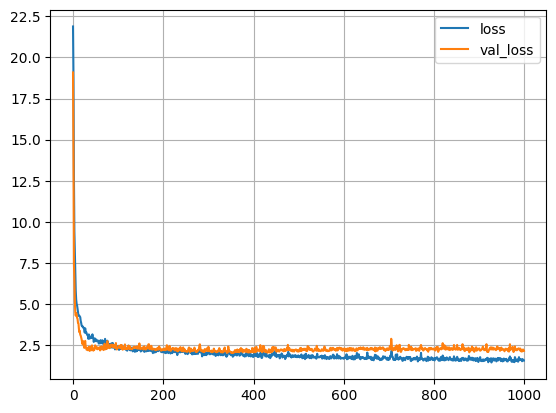

In [87]:
df = pd.DataFrame(model_history.history)
df.plot()
plt.grid(True)

In [ ]:
#model save
model.save("Boston_house_model.h5")

#load data
model = tf.keras.models.load_model("Boston_house_model.h5")

#predict

ypred = model.predict(x_test)
print(ypred[1])
print(y_test[1])

4/4 [==============================] - 0s 0s/step
[18.181812]
18.8


In [93]:
## metric is done
## we use r2 square metrics
## we want an r2 square of 1 because of the variance. if it predicts high, it should be high and vice versa


from sklearn.metrics import r2_score

test = r2_score(y_test, ypred )
test

0.8201822030675652